In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the dataset
df = pd.read_csv('/kaggle/input/india-crop-yield/Crop_Production_Statistics.csv')

# Display the first few rows of the dataset
df.head()


,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [2]:
# Count the number of unique states
num_states = df['State'].nunique()
print(f"Number of unique states: {num_states}")


Number of unique states: 37


In [3]:
# Count the number of unique crops
num_crops = df['Crop'].nunique()
print(f"Number of unique crops: {num_crops}")


Number of unique crops: 55


In [4]:
# Find the range of years
min_year = df['Crop_Year'].min()
max_year = df['Crop_Year'].max()
print(f"Range of years: {min_year} to {max_year}")


Range of years: 1997 to 2020


In [5]:
# Group by state and sum production
total_production_by_state = df.groupby('State')['Production'].sum().sort_values(ascending=False)

# Display the top 5 states
top_states_production = total_production_by_state.head(5)
print("Top 5 states with highest total production:")
print(top_states_production)


Top 5 states with highest total production:
State
Kerala            1.297006e+11
Tamil Nadu        7.805176e+10
Karnataka         6.377280e+10
Andhra Pradesh    2.607622e+10
West Bengal       8.941179e+09
Name: Production, dtype: float64


In [6]:
# Group by crop and calculate average yield
average_yield_by_crop = df.groupby('Crop')['Yield'].mean().sort_values(ascending=False)

# Display the average yield for each crop
print("Average yield for each crop:")
print(average_yield_by_crop)


Average yield for each crop:
Crop
Coconut                  8833.247721
Sugarcane                  55.592646
Banana                     29.052143
Tapioca                    18.905141
Onion                      13.178732
Potato                     13.149279
Jute                        9.387052
Sweet potato                9.280385
Cashewnut                   6.762511
Ginger                      6.640230
Mesta                       5.335766
Garlic                      4.244649
Turmeric                    3.540476
Maize                       2.651930
Tobacco                     2.648963
Bajra                       2.628699
Arecanut                    2.370328
Wheat                       2.225904
Cotton(lint)                2.111223
Rice                        2.098468
Barley                      1.916159
Oilseeds total              1.871310
Dry chillies                1.565334
other oilseeds              1.510153
Peas & beans (Pulses)       1.415164
Sannhamp                    1.376390
Grou

In [7]:
# Group by season and calculate total production
production_by_season = df.groupby('Season')['Production'].sum().sort_values(ascending=False)

# Display the production for each season
print("Production variation with different seasons:")
print(production_by_season)


Production variation with different seasons:
Season
Whole Year     3.165636e+11
Kharif         5.622335e+09
Rabi           3.150455e+09
Winter         5.877505e+08
Summer         2.437629e+08
Autumn         8.464151e+07
Name: Production, dtype: float64


**How does the production vary with different crops? Visualize the top 10 crops with the highest production.**

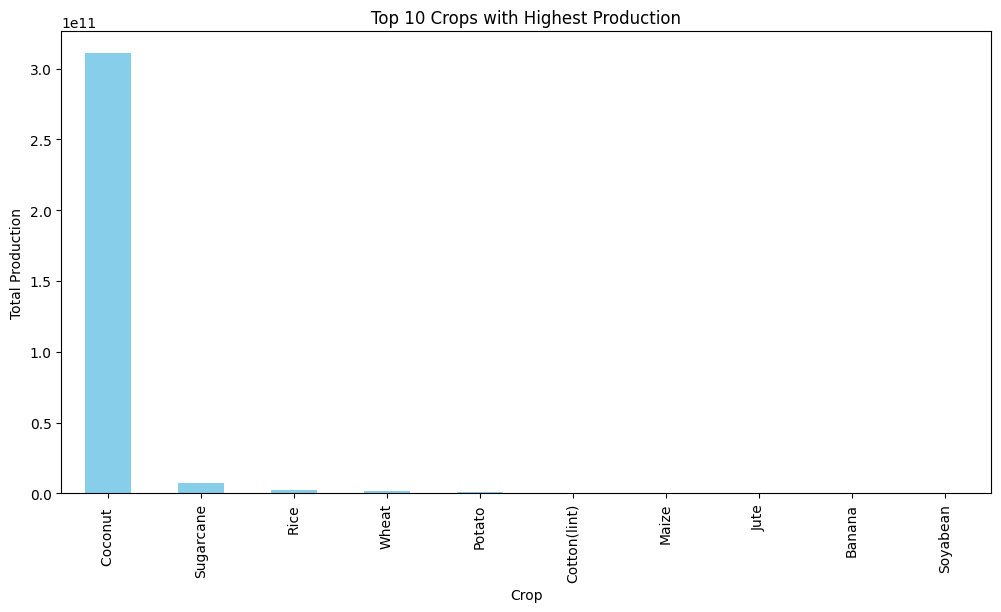

In [8]:
# Group by crop and sum production, then select top 10
top_crops_production = df.groupby('Crop')['Production'].sum().nlargest(10)

# Create a bar plot for the top 10 crops
plt.figure(figsize=(12, 6))
top_crops_production.plot(kind='bar', color='skyblue')
plt.title('Top 10 Crops with Highest Production')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()


**How has the production of a specific crop changed over the years? Visualize the trend for a chosen crop.**

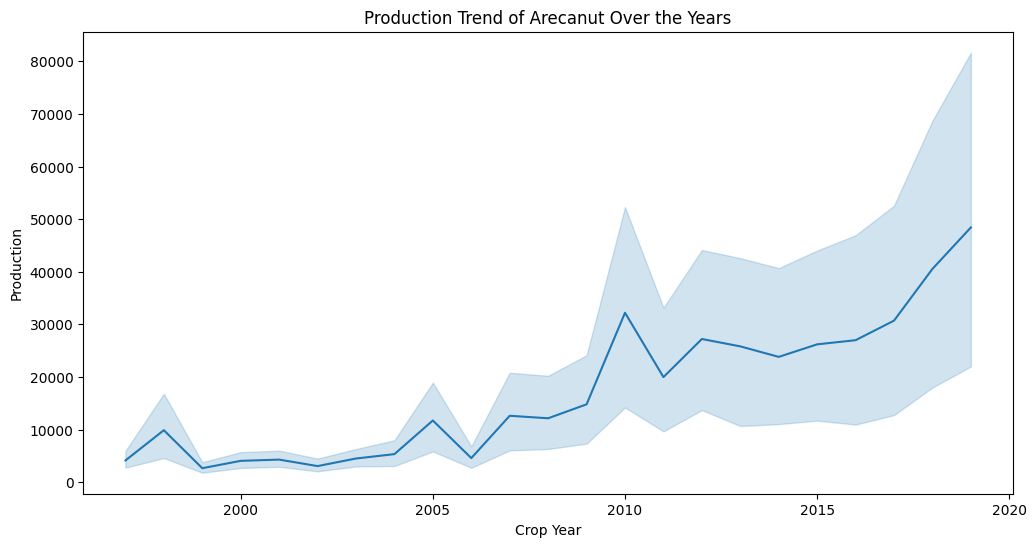

In [9]:
# Choose a specific crop for analysis
selected_crop = 'Arecanut'

# Filter data for the selected crop
crop_data = df[df['Crop'] == selected_crop]

# Create a line plot to visualize production trend over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Production', data=crop_data)
plt.title(f'Production Trend of {selected_crop} Over the Years')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()


**Can you compare the production of different crops in a specific year? Create a bar plot for a chosen year.**

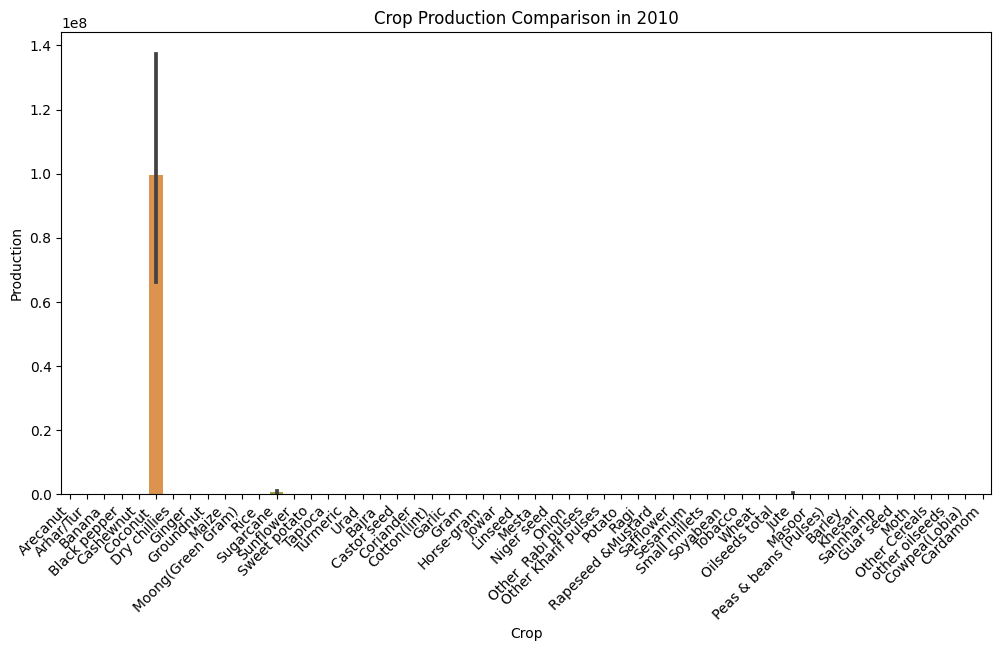

In [10]:
# Choose a specific year for analysis
selected_year = 2010  # Replace with the desired year

# Filter data for the selected year
year_data = df[df['Crop_Year'] == selected_year]

# Create a bar plot to compare production of different crops in the chosen year
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop', y='Production', data=year_data)
plt.title(f'Crop Production Comparison in {selected_year}')
plt.xlabel('Crop')
plt.ylabel('Production')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can you visualize the top 5 crops with the highest average yield?**

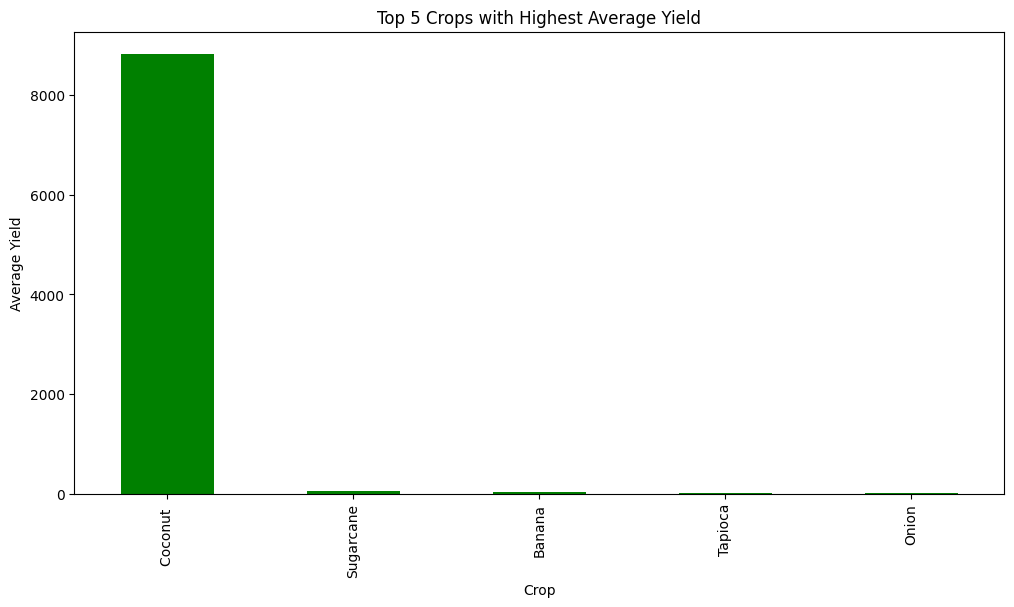

In [11]:
# Group by crop and calculate average yield, then select top 5
top_crops_yield = df.groupby('Crop')['Yield'].mean().nlargest(5)

# Create a bar plot for the top 5 crops with highest average yield
plt.figure(figsize=(12, 6))
top_crops_yield.plot(kind='bar', color='green')
plt.title('Top 5 Crops with Highest Average Yield')
plt.xlabel('Crop')
plt.ylabel('Average Yield')
plt.show()


**How does the production vary across different seasons for a specific crop? Create a bar plot for a chosen crop.**

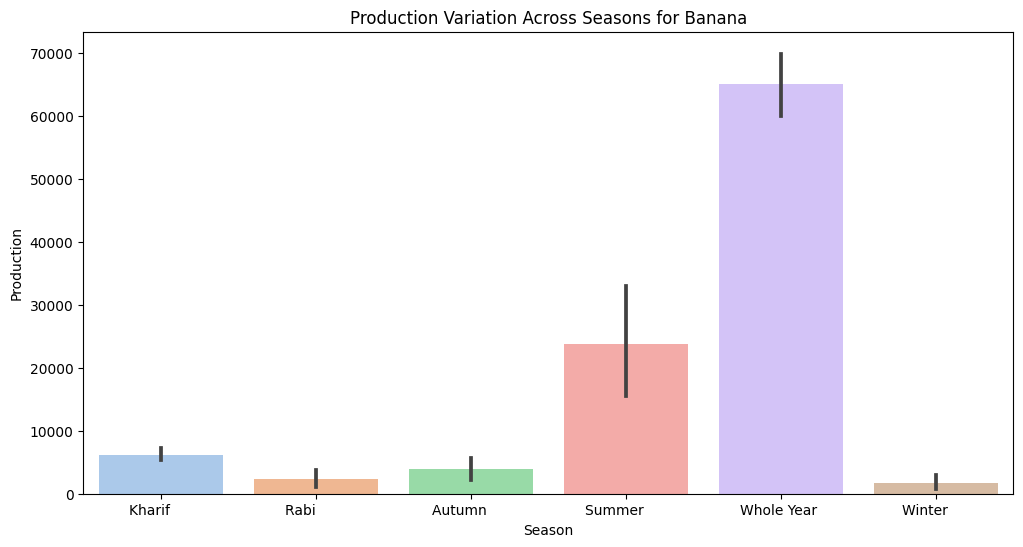

In [12]:
# Choose a specific crop for analysis
selected_crop = 'Banana'

# Filter data for the selected crop
crop_data = df[df['Crop'] == selected_crop]

# Create a bar plot to visualize production across seasons for the chosen crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Production', data=crop_data, palette='pastel')
plt.title(f'Production Variation Across Seasons for {selected_crop}')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()


**Can you visualize the top 5 crops with the highest production in a specific state?**

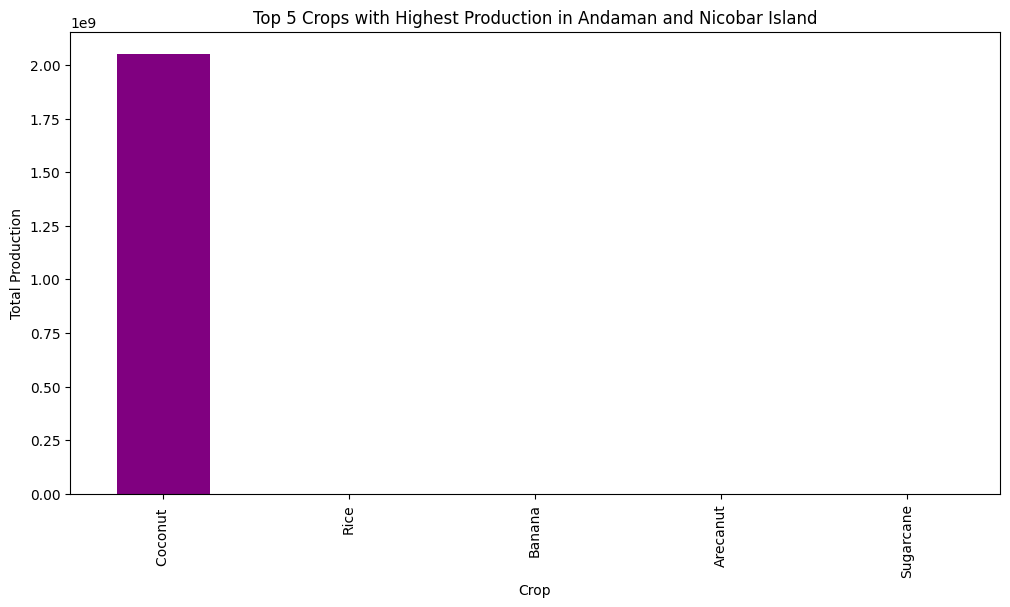

In [13]:
# Choose a specific state for analysis
selected_state = 'Andaman and Nicobar Island'

# Filter data for the selected state
state_data = df[df['State'] == selected_state]

# Group by crop and sum production, then select top 5
top_crops_state_production = state_data.groupby('Crop')['Production'].sum().nlargest(5)

# Create a bar plot for the top 5 crops in the selected state
plt.figure(figsize=(12, 6))
top_crops_state_production.plot(kind='bar', color='purple')
plt.title(f'Top 5 Crops with Highest Production in {selected_state}')
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.show()


**Can you visualize the trend of total production over the years for a specific state?**

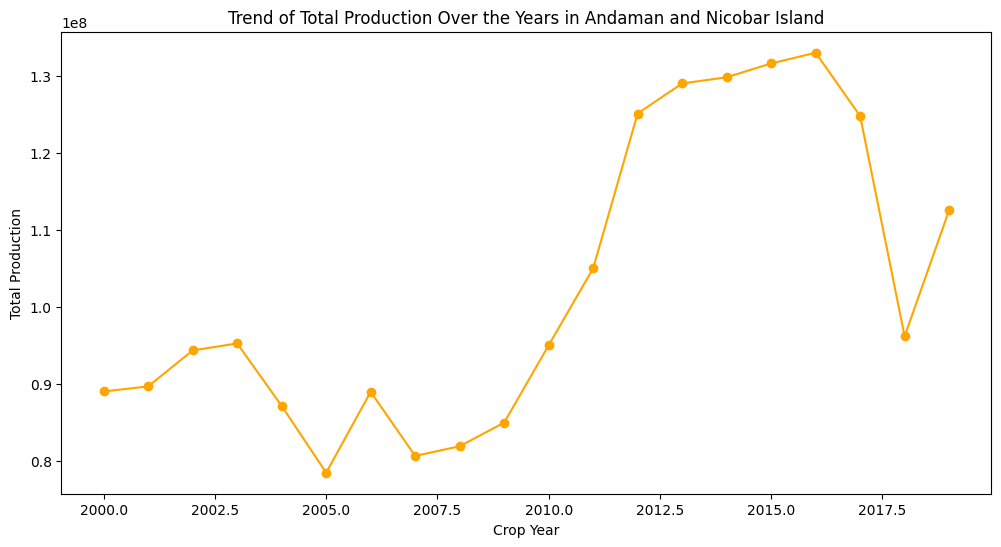

In [14]:
# Choose a specific state for analysis
selected_state = 'Andaman and Nicobar Island'

# Filter data for the selected state
state_data = df[df['State'] == selected_state]

# Group by year and sum production
total_production_by_year = state_data.groupby('Crop_Year')['Production'].sum()

# Create a line plot to visualize the trend of total production over the years
plt.figure(figsize=(12, 6))
total_production_by_year.plot(kind='line', marker='o', color='orange')
plt.title(f'Trend of Total Production Over the Years in {selected_state}')
plt.xlabel('Crop Year')
plt.ylabel('Total Production')
plt.show()


**How does the distribution of 'Yield' vary across different crops for a specific state? Visualize it using a boxplot.**

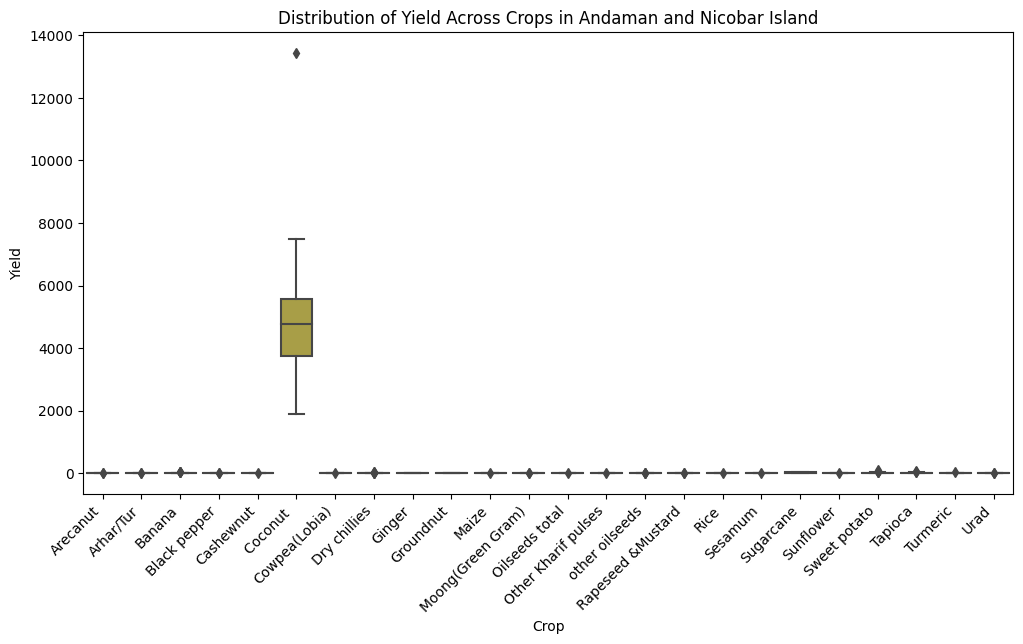

In [15]:
# Choose a specific state for analysis
selected_state = 'Andaman and Nicobar Island'

# Filter data for the selected state
state_data = df[df['State'] == selected_state]

# Create a boxplot to visualize the distribution of yield across crops for the selected state
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield', data=state_data)
plt.title(f'Distribution of Yield Across Crops in {selected_state}')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can you visualize the total production for each season across all years?**

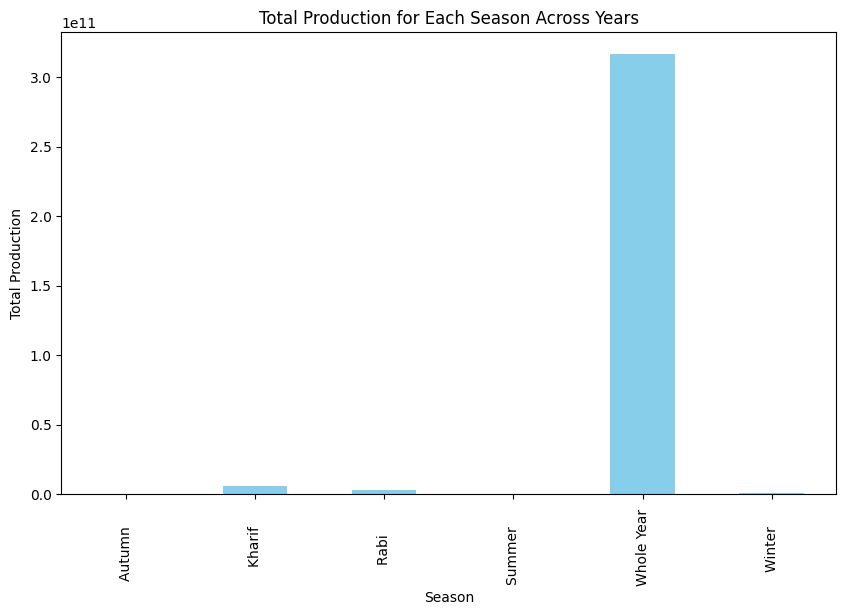

In [16]:
# Group by season and sum production
total_production_by_season = df.groupby('Season')['Production'].sum()

# Create a bar plot to visualize total production for each season
plt.figure(figsize=(10, 6))
total_production_by_season.plot(kind='bar', color='skyblue')
plt.title('Total Production for Each Season Across Years')
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.show()


**How does the average production vary across different crops? Create a horizontal bar plot.**

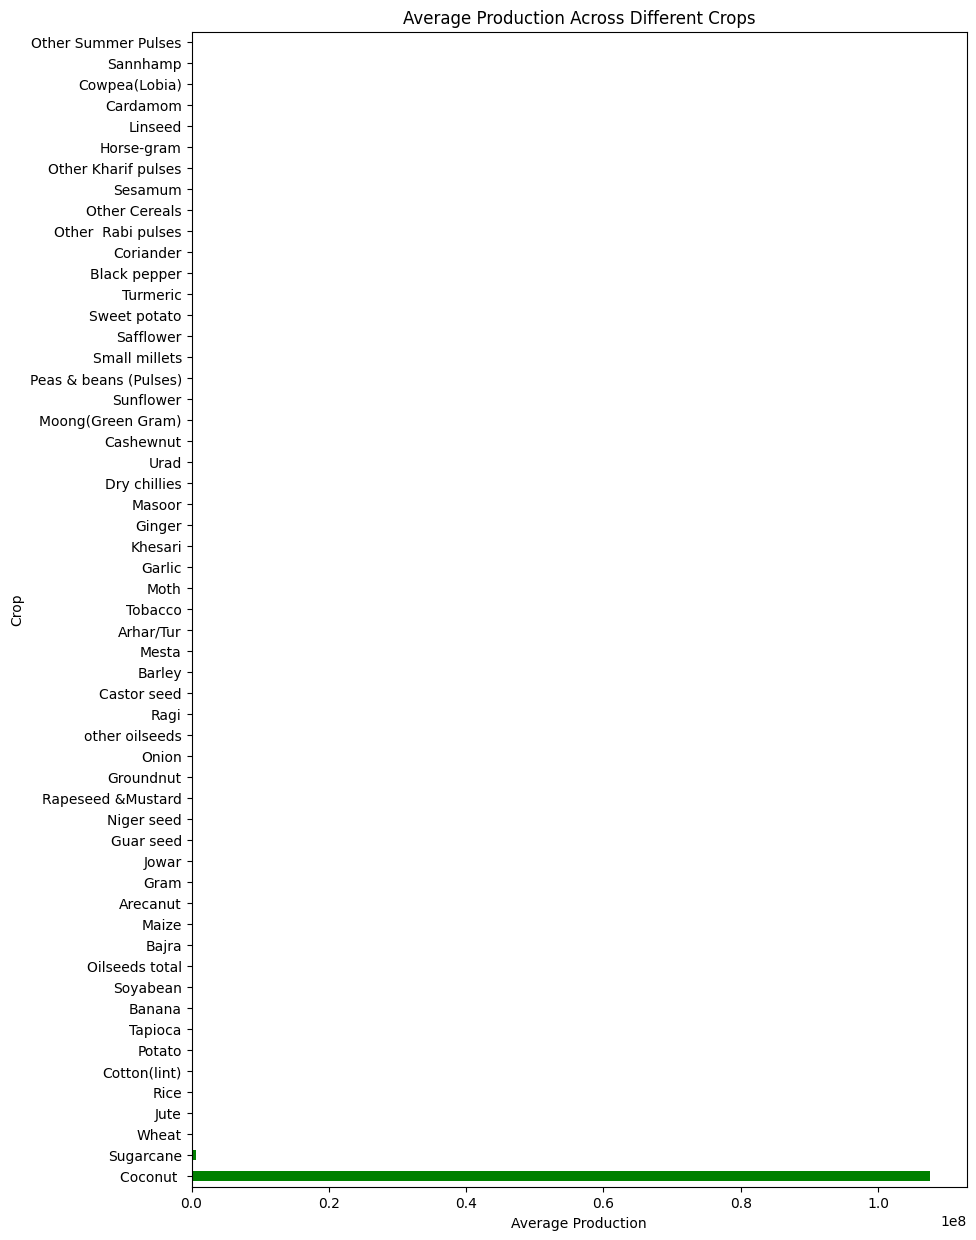

In [17]:
# Group by crop and calculate average production
average_production_by_crop = df.groupby('Crop')['Production'].mean().sort_values(ascending=False)

# Create a horizontal bar plot for average production by crop
plt.figure(figsize=(10, 15))
average_production_by_crop.plot(kind='barh', color='green')
plt.title('Average Production Across Different Crops')
plt.xlabel('Average Production')
plt.ylabel('Crop')
plt.show()


**How does the production of a specific crop vary in different seasons? Create a grouped bar plot.**

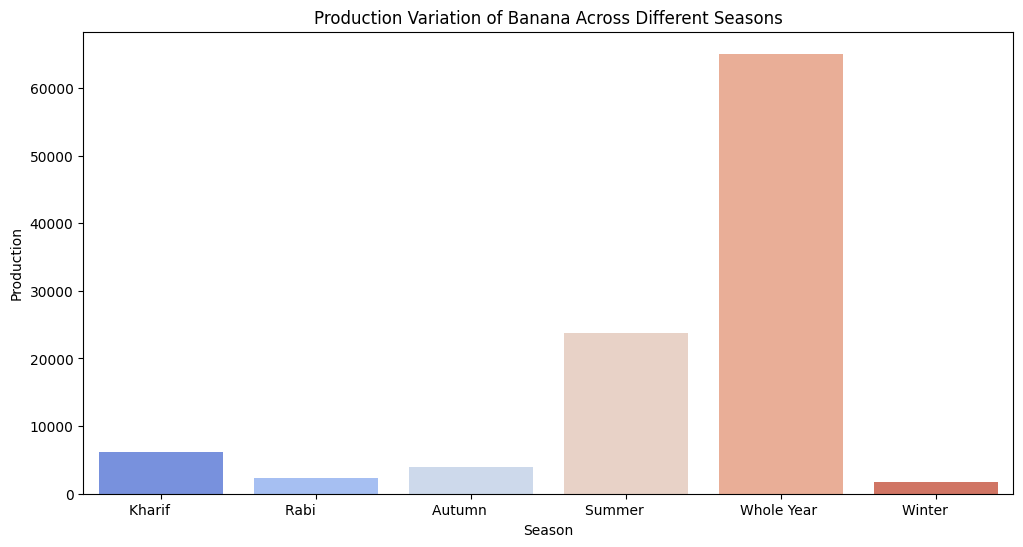

In [18]:
# Choose a specific crop for analysis
selected_crop = 'Banana'

# Filter data for the selected crop
crop_data = df[df['Crop'] == selected_crop]

# Create a grouped bar plot to visualize production in different seasons for the chosen crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Season', y='Production', data=crop_data, palette='coolwarm',errorbar=None)
plt.title(f'Production Variation of {selected_crop} Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()


**Can you compare the production of a specific crop in different years?**

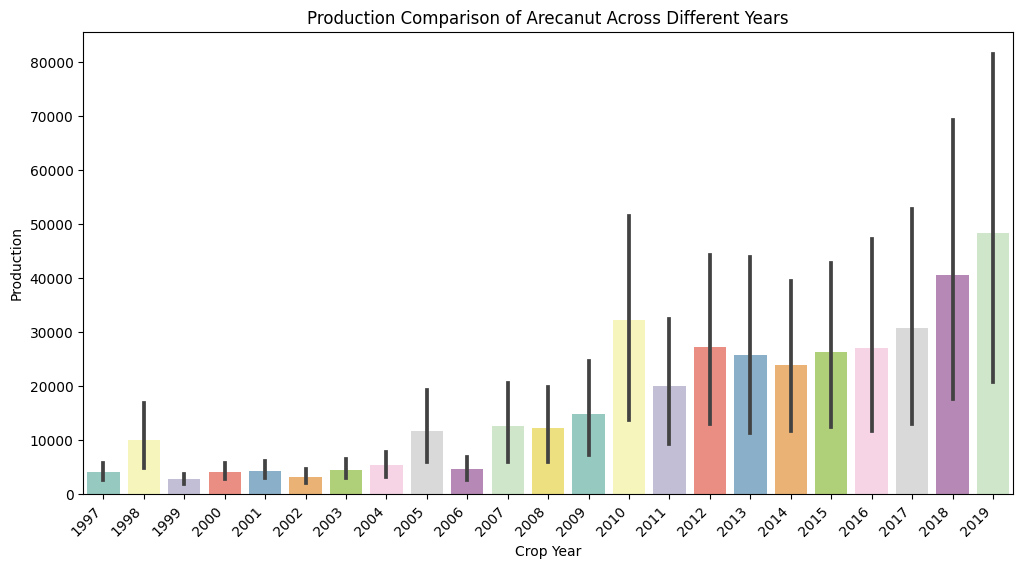

In [19]:
# Choose a specific crop for analysis
selected_crop = 'Arecanut'

# Filter data for the selected crop
crop_data = df[df['Crop'] == selected_crop]

# Create a bar plot to compare production in different years for the chosen crop
plt.figure(figsize=(12, 6))
sns.barplot(x='Crop_Year', y='Production', data=crop_data, palette='Set3')
plt.title(f'Production Comparison of {selected_crop} Across Different Years')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.xticks(rotation=45, ha='right')
plt.show()


**Can you compare the 'Yield' of different crops in a specific year?**

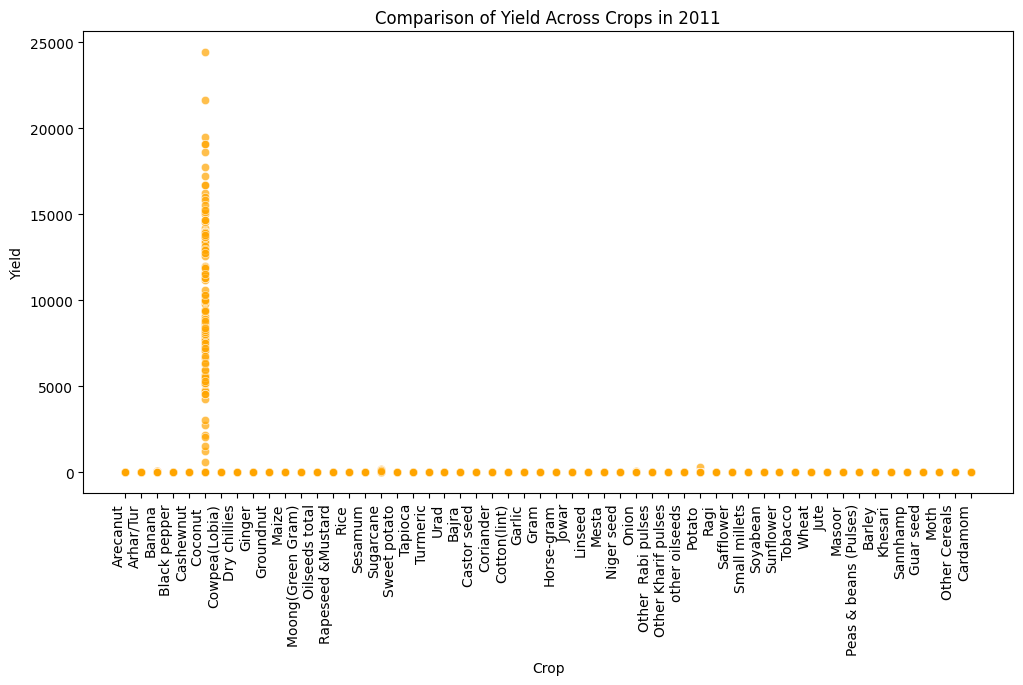

In [20]:
# Choose a specific year for analysis
selected_year = 2011  # Replace with the desired year

# Filter data for the selected year
year_data = df[df['Crop_Year'] == selected_year]

# Create a scatter plot to compare 'Yield' of different crops in the chosen year
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Crop', y='Yield', data=year_data, color='orange', alpha=0.7)
plt.title(f'Comparison of Yield Across Crops in {selected_year}')
plt.xlabel('Crop')
plt.ylabel('Yield')
plt.xticks(rotation=90, ha='right')
plt.show()


**How does the production vary with the yield for a specific crop?**

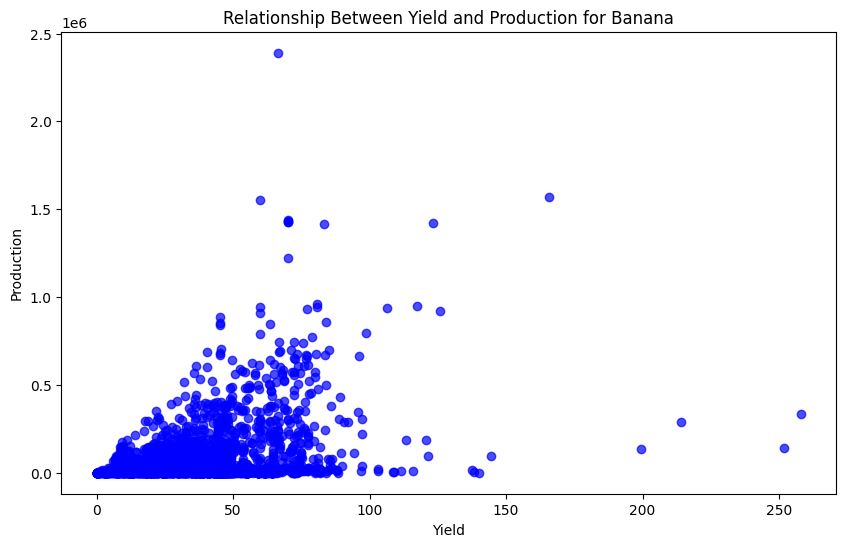

In [21]:
# Choose a specific crop for analysis
selected_crop = 'Banana'

# Filter data for the selected crop
crop_data = df[df['Crop'] == selected_crop]

# Create a scatter plot to visualize the relationship between 'Yield' and 'Production'
plt.figure(figsize=(10, 6))
plt.scatter(x='Yield', y='Production', data=crop_data, color='blue', alpha=0.7)
plt.title(f'Relationship Between Yield and Production for {selected_crop}')
plt.xlabel('Yield')
plt.ylabel('Production')
plt.show()
